In [32]:
# 1687523727_deepdao_daos.csv
import pandas as pd
df = pd.read_csv('1687523727_deepdao_daos.csv')
df.head()

,deepdaoDaoId,deepdaoOrganizationId,name,platformTitle,platformId,website,mostRecentProposalDate,aum
0,242e652c-9f58-4953-ba59-18c49d51cdc2,000de27d-b92a-495f-89be-554d022bb498,ZooGang Dao,Snapshot,11,https://snapshot.org/#/zoogangdao.eth,NaN,NaN
1,d3b7fce7-4715-4ad1-a316-412b1293eaef,004799ea-ef9e-432e-ae94-55a60f754f91,rugpullindex,Snapshot,11,https://snapshot.org/#/rugpullindex.eth,2022-03-05T04:53:53.000Z,NaN
2,a1e8e3cd-3bae-4239-8586-bd62d7c0fa0c,004d7017-ab61-40d3-aa6d-b546bb3dcd86,Komet Finance,Snapshot,11,https://snapshot.org/#/komet.eth,2021-11-26T13:33:20.000Z,NaN
3,e6cecf71-58ad-43ad-a5b6-d88228f123d6,0058e059-756c-4cf0-be93-2ea101e2cbff,Nftorbit,Snapshot,11,https://snapshot.org/#/nftorbit.eth,NaN,NaN
4,1815c9c4-690c-4092-a526-4d641bf24b4e,005ea4e2-624a-46f0-a7cd-1967d95d4092,JAMM,Snapshot,11,https://snapshot.org/#/jamm,2020-12-23T19:06:33.000Z,NaN


In [33]:
platform_types = list(df['platformTitle'].unique())
platform_types

['Snapshot',
 'Aragon',
 nan,
 'Moloch / Daohaus',
 'Governor',
 'AssetsOnly',
 'DAOstack',
 'Safe/Snapshot',
 'Realms',
 'Substrate',
 'OpenLaw',
 'Colony']

In [34]:
df = df.groupby('deepdaoOrganizationId')['platformTitle'].apply(list).reset_index()
df.head()

,deepdaoOrganizationId,platformTitle
0,000de27d-b92a-495f-89be-554d022bb498,[Snapshot]
1,004799ea-ef9e-432e-ae94-55a60f754f91,[Snapshot]
2,004d7017-ab61-40d3-aa6d-b546bb3dcd86,[Snapshot]
3,0058e059-756c-4cf0-be93-2ea101e2cbff,[Snapshot]
4,005ea4e2-624a-46f0-a7cd-1967d95d4092,[Snapshot]


In [35]:
# make a column for each platform type and boolean value
for platform_type in platform_types:
    df[platform_type] = df['platformTitle'].apply(lambda x: platform_type in x)
df.head()

,deepdaoOrganizationId,platformTitle,Snapshot,Aragon,NaN,Moloch / Daohaus,Governor,AssetsOnly,DAOstack,Safe/Snapshot,Realms,Substrate,OpenLaw,Colony
0,000de27d-b92a-495f-89be-554d022bb498,[Snapshot],True,False,False,False,False,False,False,False,False,False,False,False
1,004799ea-ef9e-432e-ae94-55a60f754f91,[Snapshot],True,False,False,False,False,False,False,False,False,False,False,False
2,004d7017-ab61-40d3-aa6d-b546bb3dcd86,[Snapshot],True,False,False,False,False,False,False,False,False,False,False,False
3,0058e059-756c-4cf0-be93-2ea101e2cbff,[Snapshot],True,False,False,False,False,False,False,False,False,False,False,False
4,005ea4e2-624a-46f0-a7cd-1967d95d4092,[Snapshot],True,False,False,False,False,False,False,False,False,False,False,False


In [36]:
# drop resources column
df['c'] = 1
df = df.drop(['deepdaoOrganizationId', 'platformTitle'], axis=1)
df = df.groupby(platform_types).count().sort_values('c')
df

c
Snapshot Aragon nan   Moloch / Daohaus Governor AssetsOnly DAOstack Safe/Snapshot Realms Substrate OpenLaw Colony      
False    True   False True             False    False      False    False         False  False     False   False      1
True     True   False False            False    True       False    False         False  False     False   False      1
                                                False      False    True          False  False     False   False      1
         False  True  False            False    False      False    False         False  False     False   False      1
                False False            True     False      False    True          False  False     False   False      1
                                       False    False      False    False         True   False     False   False      1
                                                                                  False  True      False   False      1
         True   False False            False    True       False    False         True   False     False   False      1
False    True   False False            False    True       False    True          False  False     False   False      1
                                                False      False    True          False  False     False   False      1
True     True   True  True             False    False      False    False         False  False     False   False      1
False    False  False False            False    False      True     True          False  False     False   False      1
True     False  False False            False    True       False    False         False  False     False   False      2
False    False  False False            False    False      False    False         False  False     False   True       2
True     False  False False            False    False      False    True          False  False     False   False      3
False    False  False False            False    False      False    False         False  False     True    False      3
True     False  False True             False    False      False    False         False  False     False   False      5
False    False  False False            False    False      False    False         False  True      False   False      8
                                                                    True          False  False     False   False      9
                                                           True     False         False  False     False   False     10
                                                           False    False         True   False     False   False     14
                                       True     False      False    False         False  False     False   False     17
                                       False    True       False    False         False  False     False   False     20
                      True             False    False      False    False         False  False     False   False     26
True     True   False False            False    False      False    False         False  False     False   False     26
         False  False False            True     False      False    False         False  False     False   False     38
False    True   False False            False    False      False    False         False  False     False   False     43
         False  True  False            False    False      False    False         False  False     False   False     57
True     False  False False            False    False      False    False         False  False     False   False   2077

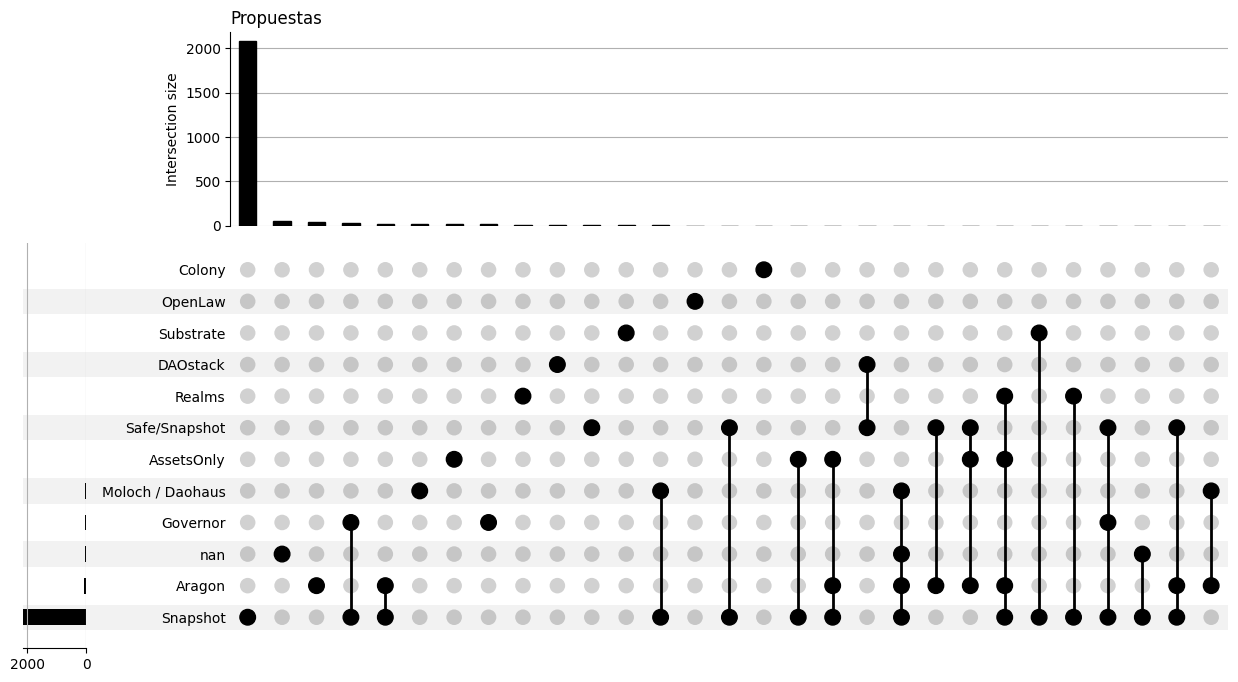

In [37]:
import upsetplot
import matplotlib.pyplot as plt

upsetplot.plot(df['c'], sort_by="cardinality")
plt.title('Propuestas', loc='left')
plt.show()